# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key from a file that is ignored by Git (.gitignore file) so the key isn't exposed to the public

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities.csv"

In [2]:
# Identify range of latitudes/longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create List for holding lat_lngs and Cities

lat_lngs = []
cities = []
countries = []

# Create sets of random latitude/longitude combinations -- Zip into list of Tuples

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify closest City for each latitude/longitude combination using Citypy -- Return unique Cities and Country codes

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If City is unique, add to Cities List
    
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Merge the two lists into one List of Tuples using Zip

city_country = zip(cities,countries)

# Print City Count -- Confirm value is greater than 500
print(len(cities))

627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config information

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Lists to hold reponse information

city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv

myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={weather_api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    # if the city is not found on the WeatherAPI site then the "except" will catch the error and the loop will
    # continue to go through the rest of the city,country_codes in the city_country list
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output Retreived values to CSV file
        
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
        # Create Handler for exceptions when Cities are not available in Weather API
        
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append Null Values so lists are same lengths
        
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close file handle after loop completes

myprintlog.close()
myAPIdata.close()

kuche,cn was not found in the Weathermap API

Xining with city ID:1788852 was found in the Weathermap API

mys shmidta,ru was not found in the Weathermap API

Avarua with city ID:4035715 was found in the Weathermap API

Nikolskoye with city ID:546105 was found in the Weathermap API

Kadnikov with city ID:554554 was found in the Weathermap API

Hobart with city ID:2163355 was found in the Weathermap API

Rikitea with city ID:4030556 was found in the Weathermap API

Baryshivka with city ID:712787 was found in the Weathermap API

taolanaro,mg was not found in the Weathermap API

Bethel with city ID:5282297 was found in the Weathermap API

Son La with city ID:1567681 was found in the Weathermap API

São Filipe with city ID:3374210 was found in the Weathermap API

Taoudenni with city ID:2450173 was found in the Weathermap API

Saint-Philippe with city ID:935215 was found in the Weathermap API

Faanui with city ID:4034551 was found in the Weathermap API

Kijang with city ID:1640044 was found

Shunyi with city ID:2034754 was found in the Weathermap API

Borzya with city ID:2026126 was found in the Weathermap API

Ardakān with city ID:143073 was found in the Weathermap API

ardakan,ir was not found in the Weathermap API

Mayo with city ID:6068416 was found in the Weathermap API

Cape Town with city ID:3369157 was found in the Weathermap API

Cosamaloapan with city ID:3530177 was found in the Weathermap API

Iaciara with city ID:3461641 was found in the Weathermap API

Sabang with city ID:1214026 was found in the Weathermap API

Atuona with city ID:4020109 was found in the Weathermap API

Tiksi with city ID:2015306 was found in the Weathermap API

Arraial do Cabo with city ID:3471451 was found in the Weathermap API

Camacha with city ID:2270385 was found in the Weathermap API

Souillac with city ID:933995 was found in the Weathermap API

Hay River with city ID:5972762 was found in the Weathermap API

Tank with city ID:1163905 was found in the Weathermap API

puerto pinasco,py 

Narsaq with city ID:3421719 was found in the Weathermap API

Homer with city ID:5864145 was found in the Weathermap API

Kavieng with city ID:2094342 was found in the Weathermap API

Tual with city ID:1623197 was found in the Weathermap API

asau,tv was not found in the Weathermap API

Parrsboro with city ID:6098717 was found in the Weathermap API

Chippewa Falls with city ID:5248511 was found in the Weathermap API

Takoradze with city ID:2294915 was found in the Weathermap API

Oktyabr'skoye with city ID:515805 was found in the Weathermap API

Nome with city ID:5870133 was found in the Weathermap API

Araouane with city ID:2460954 was found in the Weathermap API

Ancud with city ID:3899695 was found in the Weathermap API

Mitsamiouli with city ID:921786 was found in the Weathermap API

Novyy Svit with city ID:698861 was found in the Weathermap API

vila,vu was not found in the Weathermap API

Houston with city ID:5977783 was found in the Weathermap API

Atchison with city ID:4267733 w

Touros with city ID:3386213 was found in the Weathermap API

São João da Barra with city ID:3448903 was found in the Weathermap API

Kathu with city ID:1153035 was found in the Weathermap API

Abapó with city ID:3924668 was found in the Weathermap API

La Reforma with city ID:4000490 was found in the Weathermap API

Bellavista with city ID:3699364 was found in the Weathermap API

Stjørdalshalsen with city ID:3136765 was found in the Weathermap API

vaitupu,wf was not found in the Weathermap API

Felipe Carrillo Puerto with city ID:3527639 was found in the Weathermap API

Jiaozuo with city ID:1805987 was found in the Weathermap API

Buta with city ID:217570 was found in the Weathermap API

Gurlan with city ID:1513962 was found in the Weathermap API

Yenagoa with city ID:2318123 was found in the Weathermap API

Isparta Province with city ID:311071 was found in the Weathermap API

Rancho Palos Verdes with city ID:5386035 was found in the Weathermap API

Beringovskiy with city ID:2126710 w

Taltal with city ID:3870243 was found in the Weathermap API

Xiongzhou with city ID:1788402 was found in the Weathermap API

Benghazi with city ID:88319 was found in the Weathermap API

San Quintín with city ID:3984997 was found in the Weathermap API

Miyako with city ID:2111884 was found in the Weathermap API

Coxim with city ID:3465228 was found in the Weathermap API

Ternate with city ID:1624041 was found in the Weathermap API

Opuwo with city ID:3354077 was found in the Weathermap API

muzquiz,mx was not found in the Weathermap API

Manzhouli with city ID:2035836 was found in the Weathermap API

Lavrentiya with city ID:4031637 was found in the Weathermap API

Rocha with city ID:3440777 was found in the Weathermap API

Korla with city ID:1529376 was found in the Weathermap API

Hīt with city ID:95788 was found in the Weathermap API

hit,iq was not found in the Weathermap API

Vanino with city ID:2119932 was found in the Weathermap API

Grindavik with city ID:3416888 was found in the

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a Dictionary from the lists created above

weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Use Dictionary to create DataFrame weather_data

cities_temps_df = pd.DataFrame(weather_dict)
cities_temps_df.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1,1788852.0,Xining,CN,36.62,101.77,11/06/20,34.66,65.0,0.0,2.10
2,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN
3,4035715.0,Avarua,CK,-21.21,-159.78,11/06/20,71.60,94.0,83.0,2.24
4,546105.0,Nikolskoye,RU,59.70,30.79,11/06/20,44.73,70.0,0.0,11.18


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = cities_temps_df.loc[cities_temps_df["humidity"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = cities_temps_df["latitude"]
    temperatures = cities_temps_df["temp"]
    humidity = cities_temps_df["humidity"]
    cloudiness = cities_temps_df["cloudiness"]
    windspeed = cities_temps_df["wind_speed"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = cities_temps_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["latitude"]
    temperatures = clean_city_data["temp"]
    humidity = clean_city_data["humidity"]
    cloudiness = clean_city_data["cloudiness"]
    windspeed = clean_city_data["wind_speed"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

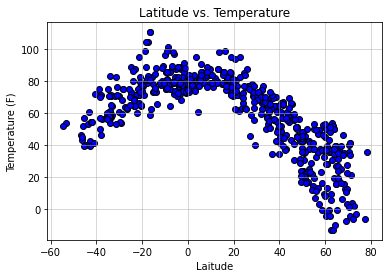

In [6]:
# Create Latitude vs. Temperature Plot

plt.scatter(weather_dict["latitude"], weather_dict["temp"], facecolor = "blue", edgecolor = "black")

# Set Title

plt.title("Latitude vs. Temperature")

# Set x axis label

plt.xlabel("Laitude")

# Set y axis label

plt.ylabel("Temperature (F)")

# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file

plt.savefig("../images/latitude_temperature_plot.png")

## Latitude vs. Humidity Plot

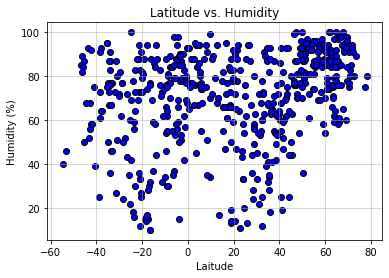

In [7]:
# Create Latitude vs. Humidity Plot

plt.scatter(weather_dict["latitude"], weather_dict["humidity"], facecolor = "blue", edgecolor = "black")

# Set Title

plt.title("Latitude vs. Humidity")

# Set x axis label

plt.xlabel("Laitude")

# Set y axis label

plt.ylabel("Humidity (%)")

# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file

plt.savefig("../images/latitude_humidity_plot.png")

## Latitude vs. Cloudiness Plot

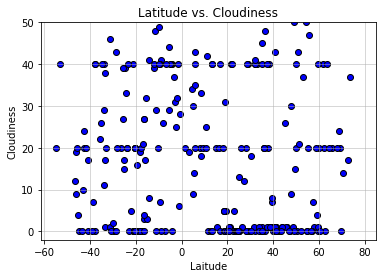

In [8]:
# Create Latitude vs. Coudiness Plot

plt.scatter(weather_dict["latitude"], weather_dict["cloudiness"], facecolor = "blue", edgecolor = "black")

# Set Title

plt.title("Latitude vs. Cloudiness")

# Set x axis label

plt.xlabel("Laitude")

# Set y axis label

plt.ylabel("Cloudiness")

# Set y axis limit

plt.ylim(-2,50)

# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file

plt.savefig("../images/latitude_cloudiness_plot.png")

## Latitude vs. Wind Speed Plot

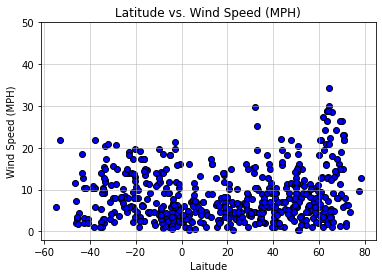

In [9]:
# Create Latitude vs. Wind Speed Plot

plt.scatter(weather_dict["latitude"], weather_dict["wind_speed"], facecolor = "blue", edgecolor = "black")

# Set Title

plt.title("Latitude vs. Wind Speed (MPH)")

# Set x axis label

plt.xlabel("Laitude")

# Set y axis label

plt.ylabel("Wind Speed (MPH)")

# Set y axis limit

plt.ylim(-2,50)

# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file

plt.savefig("../images/latitude_Wind_speed_plot.png")

## Linear Regression

In [10]:
# Create DataFrames for Northern and Southern Hemispheres

northern_hemisphere = cities_temps_df.loc[cities_temps_df["latitude"]>0.01]
southern_hemisphere = cities_temps_df.loc[cities_temps_df["latitude"]<-0.01]

# northern_hemisphere.head()

northern_hemisphere.head()

# southern_hemisphere.head()

southern_hemisphere.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
3,4035715.0,Avarua,CK,-21.21,-159.78,11/06/20,71.60,94.0,83.0,2.24
6,2163355.0,Hobart,AU,-42.88,147.33,11/06/20,42.73,56.0,10.0,12.75
7,4030556.0,Rikitea,PF,-23.12,-134.97,11/06/20,71.51,83.0,54.0,18.95
14,935215.0,Saint-Philippe,RE,-21.36,55.77,11/06/20,66.18,73.0,90.0,17.22
15,4034551.0,Faanui,PF,-16.48,-151.75,11/06/20,79.65,77.0,3.0,17.38


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.85450915587206
y = -1.07x + 94.63


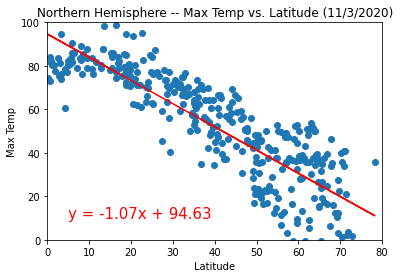

In [49]:
# Create Scatter Plot for Northern Hemisphere -- Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere['latitude']
y_values = northern_hemisphere['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere -- Max Temp vs. Latitude (11/3/2020)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max Temp")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/temp_lat_lingress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3012377967827253
y = 0.3x + 61.35


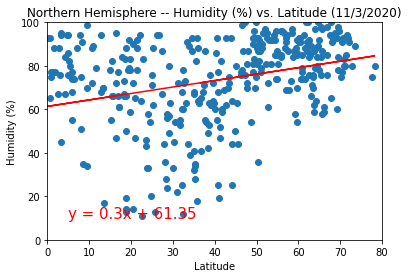

In [52]:
# Create a Scatter Plot for Northern Hemisphere -- Humidity (%) vs. Latitude Linear Regression

x_values = northern_hemisphere['latitude']
y_values = northern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere -- Humidity (%) vs. Latitude (11/3/2020)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/humidity_lat_lingress.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05348059346018243
y = 0.09x + 67.26


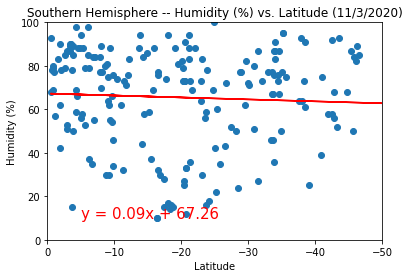

In [58]:
# Create a Scatter Plot for Southern Hemisphere -- Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere['latitude']
y_values = southern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere -- Humidity (%) vs. Latitude (11/3/2020)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, -50)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/sh_humidity_lat_lingress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2133429540095542
y = 0.4x + 37.46


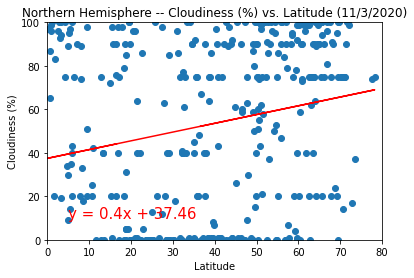

In [53]:
# Create a Scatter Plot for Northern Hemisphere -- Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere['latitude']
y_values = northern_hemisphere['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere -- Cloudiness (%) vs. Latitude (11/3/2020)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/cloudiness_lat_lingress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3094299898473503
y = 0.81x + 62.77


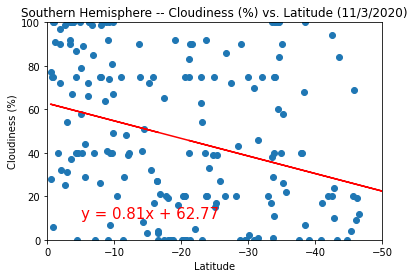

In [59]:
# Create a Scatter Plot for Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hemisphere['latitude']
y_values = southern_hemisphere['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere -- Cloudiness (%) vs. Latitude (11/3/2020)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, -50)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/sh_cloudiness_lat_lingress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.32368812822445864
y = 0.1x + 4.42


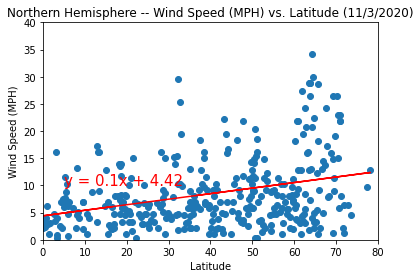

In [64]:
# Create a Scatter Plot for Northern Hemisphere -- Wind Speed (MPH) vs. Latitude Linear Regression

x_values = northern_hemisphere['latitude']
y_values = northern_hemisphere['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere -- Wind Speed (MPH) vs. Latitude (11/3/2020)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,40)
plt.xlim(0,80)

plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/wind_speed_lat_lingress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.11700082943023242
y = -0.05x + 7.49


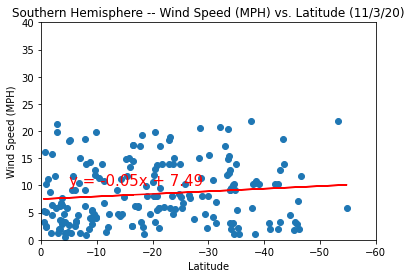

In [66]:
# Create a Scatter Plot for Southern Hemisphere -- Wind Speed (MPH) vs. Latitude Linear Regression

x_values = southern_hemisphere['latitude']
y_values = southern_hemisphere['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere -- Wind Speed (MPH) vs. Latitude (11/3/20)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-5,10),fontsize=15,color="red")

plt.ylim(0,40)
plt.xlim(0,-60)

plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/sh_wind_speed_lat_lingress.png")